After completion of Stanford online's Machine Learning Specialization, I will work though chapter 5 of Python for Algorithmic Trading (Hilpisch,2020) to practice implementing ML theory discussed in the course.

Using Linear Regression for Market Movement Prediction

Before working through this part of the textbook an initial consideration is the problem of extrapolation of a linear regression.

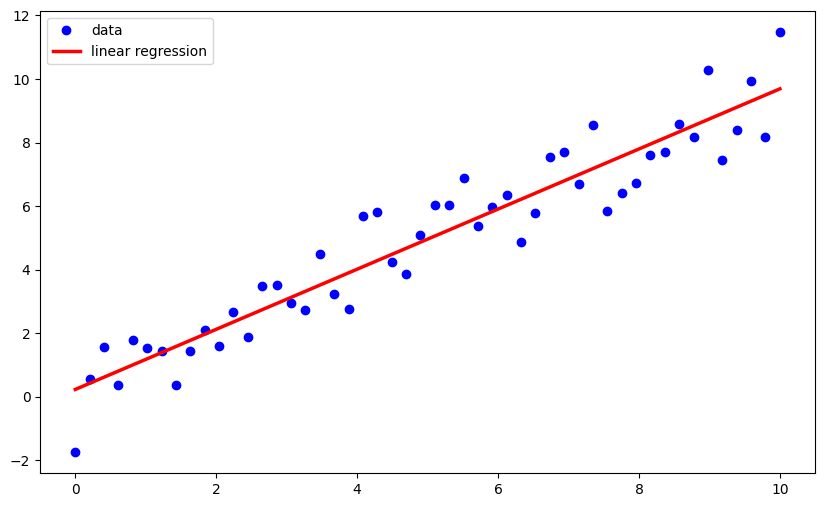

In [1]:
# Generation of a Linear Regression using Numpy

import random
import numpy as np
from pylab import mpl, plt

x = np.linspace(0,10)

def set_seeds(seed = 100):
    random.seed(seed)
    np.random.seed(seed)
set_seeds()

y = x + np.random.standard_normal(len(x))

reg = np.polyfit(x, y, deg=1) # numpy regression deg = 1 means linear regression / order of regression line = 1 

plt.figure(figsize=(10,6))
plt.plot(x, y, 'bo', label = 'data')
plt.plot(x, np.polyval(reg, x), 'r' , lw = 2.5, label = 'linear regression')
plt.legend(loc = 0)
plt.show()


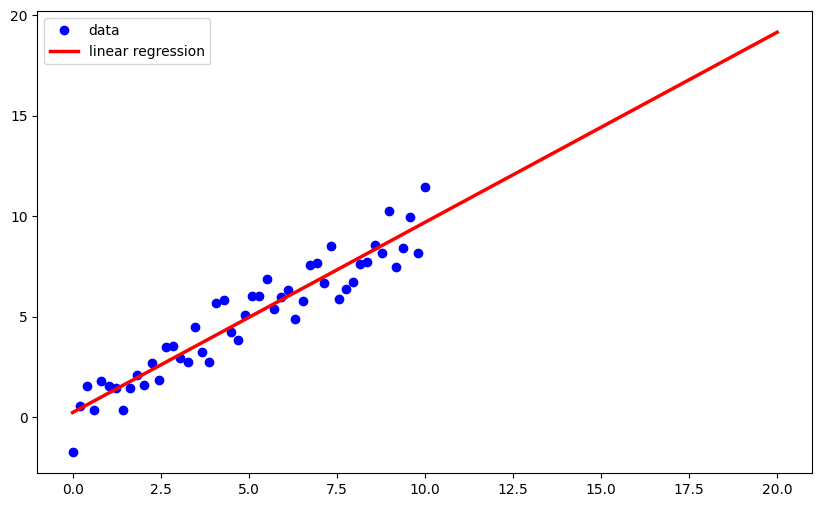

In [2]:
# Extrapolating
plt.figure(figsize=(10,6))
plt.plot(x, y, 'bo', label = 'data')

xn = np.linspace(0, 20)
plt.plot(xn, np.polyval(reg, xn), 'r' , lw = 2.5, label = 'linear regression')
plt.legend(loc = 0)
plt.show()

# This is guessing as we do not know the underlying data generation process

In [3]:
# The author focuses on the importance of chronological order to data

x = np.arange(12)


lags = 3

m = np.zeros((lags + 1, len(x) - lags))

m[lags] = x[lags:]

for i in range(lags):
    m[i] = x[i: i - lags]

m.T

array([[ 0.,  1.,  2.,  3.],
       [ 1.,  2.,  3.,  4.],
       [ 2.,  3.,  4.,  5.],
       [ 3.,  4.,  5.,  6.],
       [ 4.,  5.,  6.,  7.],
       [ 5.,  6.,  7.,  8.],
       [ 6.,  7.,  8.,  9.],
       [ 7.,  8.,  9., 10.],
       [ 8.,  9., 10., 11.]])

In [4]:
# In the transposed ndarray object m, the first three columns contain the values for the three independent variables (observations of the past 3 days). They together form the matrix A. The fourth and final column represents the vector b. As a result,#
# linear regression then yields the missing vector x. 

reg = np.linalg.lstsq(m[:lags].T, m[lags], rcond=None)[0] # Ols regression parameters / coefficients for the explanatory variables

np.dot(m[:lags].T, reg) # dot product of the 'observations' and the 'coefficients of the independent variables' correctly returns the 4th column, the prediction results, supposedly infering accuracy of the model


array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [5]:
# The author goes on to apply this to time series data of the the EUR/USD exchange rate

# using the dataset of the textbook

import pandas as pd

raw = pd.read_csv('http://hilpisch.com/pyalgo_eikon_eod_data.csv', index_col = 0 , parse_dates=True).dropna()

raw.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2516 non-null   float64
 1   MSFT.O  2516 non-null   float64
 2   INTC.O  2516 non-null   float64
 3   AMZN.O  2516 non-null   float64
 4   GS.N    2516 non-null   float64
 5   SPY     2516 non-null   float64
 6   .SPX    2516 non-null   float64
 7   .VIX    2516 non-null   float64
 8   EUR=    2516 non-null   float64
 9   XAU=    2516 non-null   float64
 10  GDX     2516 non-null   float64
 11  GLD     2516 non-null   float64
dtypes: float64(12)
memory usage: 255.5 KB


In [6]:
raw.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37


In [7]:
symbol = 'EUR='

data = pd.DataFrame(raw[symbol]) 
data.head(5)

data.rename(columns = {symbol: 'price'} , inplace = True)

data.head(5)

,price
Date,
2010-01-04,1.4411
2010-01-05,1.4368
2010-01-06,1.4412
2010-01-07,1.4318
2010-01-08,1.4412


In [8]:
# Implementation of preceding price prediction method

lags = 5

cols = []

for lag in range(1, lags+1):
    col = f'lag_{lag}'
    data[col] = data['price'].shift(lag) # shifts price column by its lag
    cols.append(col)
data.dropna(inplace = True)

data

,price,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,,
2010-01-11,1.4513,1.4412,1.4318,1.4412,1.4368,1.4411
2010-01-12,1.4494,1.4513,1.4412,1.4318,1.4412,1.4368
2010-01-13,1.4510,1.4494,1.4513,1.4412,1.4318,1.4412
2010-01-14,1.4502,1.4510,1.4494,1.4513,1.4412,1.4318
2010-01-15,1.4382,1.4502,1.4510,1.4494,1.4513,1.4412
...,...,...,...,...,...,...
2019-12-24,1.1087,1.1086,1.1078,1.1120,1.1111,1.1149
2019-12-26,1.1096,1.1087,1.1086,1.1078,1.1120,1.1111
2019-12-27,1.1175,1.1096,1.1087,1.1086,1.1078,1.1120


In [9]:
reg = np.linalg.lstsq(data[cols], data['price'], rcond = None)[0]

reg

array([ 0.98635864,  0.02292172, -0.04769849,  0.05037365, -0.01208135])

<Axes: xlabel='Date'>

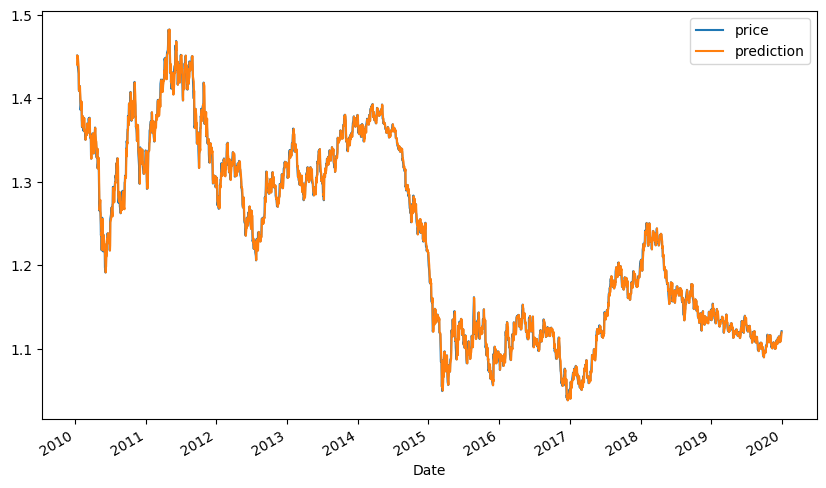

In [12]:
# The regression coefficient estimates support the Random Walk Hypothesis that the best predictor for tommorow's price is todays price.

data['prediction'] = np.dot(data[cols], reg)
data[['price', 'prediction']].plot(figsize = (10,6))

# The following figure shows the EUR/USD exchange rate and the predicted values. Looking over such a large time span the results in the long term are near identical. Clearly this is because there is minimal variation between the closing price of 
# sequential days and the regression coefficient of the previous days price is 0.98
 
 # Focusing on a shorter time window



<Axes: xlabel='Date'>

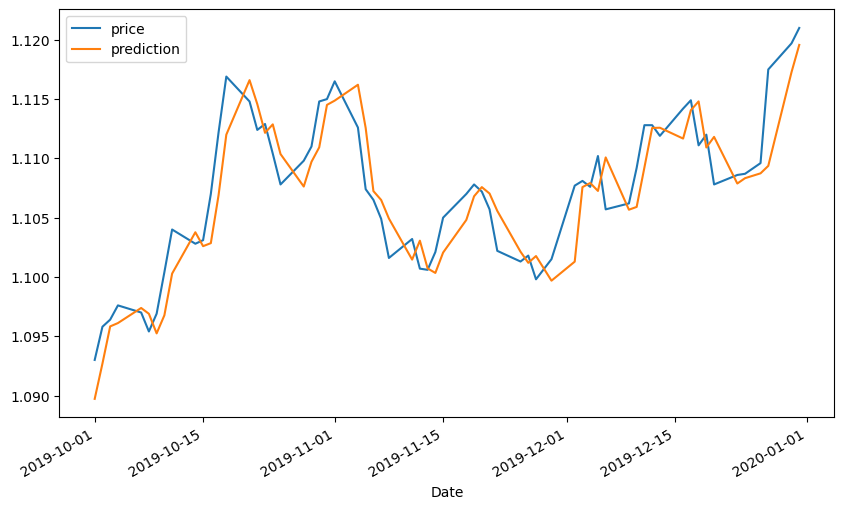

In [13]:
data[['price', 'prediction']].loc['2019-10-1':].plot(figsize = (10,6))

In [14]:
# We observe the prediction is roughly a shift of todays price, as expected due to the regression coefficients.

In [17]:
# One consideration is that OLS assumptions are violated by residual autocorrelation, which is caused by time series being non-stationary.

# Lets test for stationarity in the exchange rate.

from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(data['price'],  maxlag = None, autolag='BIC')
print("ADF Statistic:", adf_test[0])
print("p-value:", adf_test[1])
print("Critical Values:", adf_test[4])

ADF Statistic: -2.0197945542216877
p-value: 0.27796188264771615
Critical Values: {'1%': np.float64(-3.4329579682301254), '5%': np.float64(-2.8626921885291017), '10%': np.float64(-2.5673833542324727)}


In [ ]:
# The null hypothesis is that the series is non-stationary

# Our p-value is 0.277 implying that given the null hypothesis is true we have a 27.7% chance of observing values as extreme as our ADF statistic, meaning there is insufficient evidence to reject the null hypothesis of the price series having a unit root
# and being non-stationary

# Often log returns make a series stationary.


data['return'] = np.log(data['price']/ data['price'].shift(1))

data.dropna(inplace = True)

adf_test1 = adfuller(data['return'],  maxlag = None, autolag='BIC')
print(f'ADF Statistic:', adf_test1[0])
print(f"p-value:", adf_test1[1])
print("Critical Values:", adf_test1[4])

# The log return series is stationary

ADF Statistic: -50.87845550061728
p-value: 0.0
Critical Values: {'1%': np.float64(-3.4329610922579095), '5%': np.float64(-2.8626935681060375), '10%': np.float64(-2.567384088736619)}


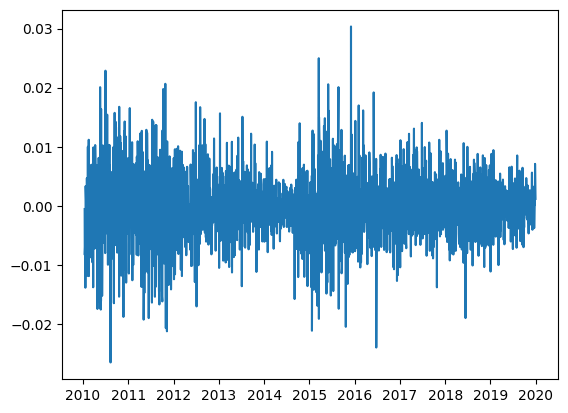

In [23]:
plt.plot(data['return'])

In [26]:
cols = []

for lag in range(1, lags + 1):
    col = f'lag_{lag}' 
    data[col] = data['return'].shift(lag)
    cols.append(col)
data.dropna(inplace=True)

reg = np.linalg.lstsq(data[cols], data['return'], rcond=None)[0]

data.head(1)

,price,lag_1,lag_2,lag_3,lag_4,lag_5,prediction,return
Date,,,,,,,,
2010-02-05,1.3662,-0.01187,-0.004523,0.002438,0.004678,-0.007188,1.373338,-0.005256


In [27]:
reg

array([-0.01798926,  0.00856743, -0.03596894,  0.011783  , -0.00803731])

<Axes: xlabel='Date'>

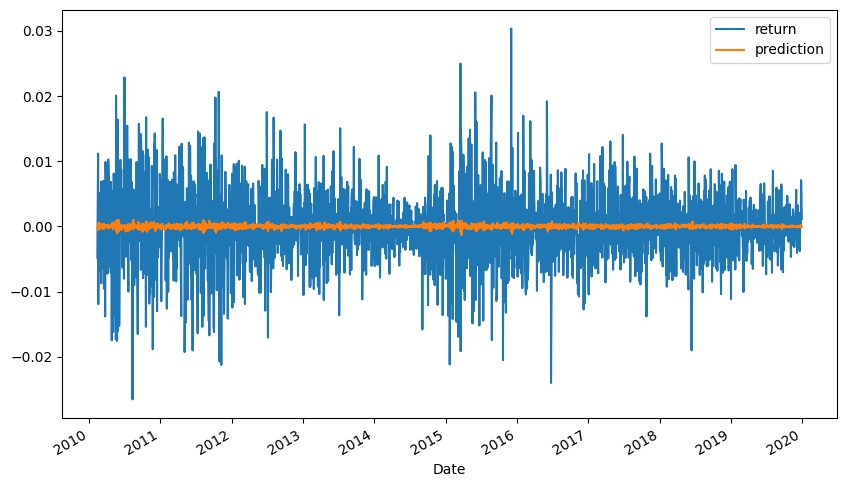

In [28]:
data['prediction'] = np.dot(data[cols],reg)
data[['return', 'prediction']].iloc[lags:].plot(figsize = (10,6))

<Axes: xlabel='Date'>

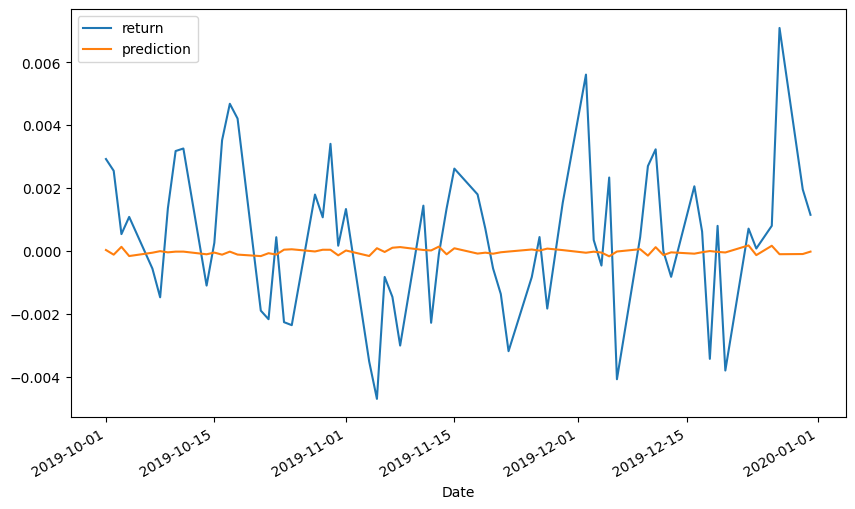

In [30]:
# Clearly linear regression cannot predict the magnitude of future returns, however some might argue the utility lies in whether the direction can be forecasted correctly or not. 

data[['return', 'prediction']].loc['2019-10-1':].plot(figsize = (10,6))

In [43]:
# Calculating the proportion of correct direction forecasts.

# the product of the market return and prediction should be positive when prediction is correct 
# when the market goes down and the model predicts this the product of two negative returns will be positive
# thus we can use a sign boolean to calculate the percentage of correct predictions, quite intuitive from the author

hits = np.sign(data['return'] * data['prediction']).value_counts()

print(hits)

proportion = hits.values[0]/ len(data)

print(f"Percentage of correct predictions {(proportion * 100) :.2f} % ")

 1.0    1243
-1.0    1237
 0.0      13
Name: count, dtype: int64
Percentage of correct predictions 49.86 % 


In [44]:
# Can we improve the hit ratio?

# what if we implement the linear regression based on the sign of the log returns 

In [47]:
reg = np.linalg.lstsq(data[cols], np.sign(data['return']), rcond = None)[0]
data['prediction'] = np.sign(np.dot(data[cols], reg))
data['prediction'].value_counts()

hits = np.sign(data['return'] * data['prediction']).value_counts() 
proportion = hits.values[0]/ sum(hits)

print(f"Percentage of correct predictions {(proportion * 100) :.2f} % ")

Percentage of correct predictions 51.91 % 


The author places emphasis on the convention that the 10 best and worst days in the market for a given period of time considerably influence the overall performance of investments. Thus timing matters of investment vs the prediction of the regression. So the prediction rate is not as important as the returns of the predictive strategy.

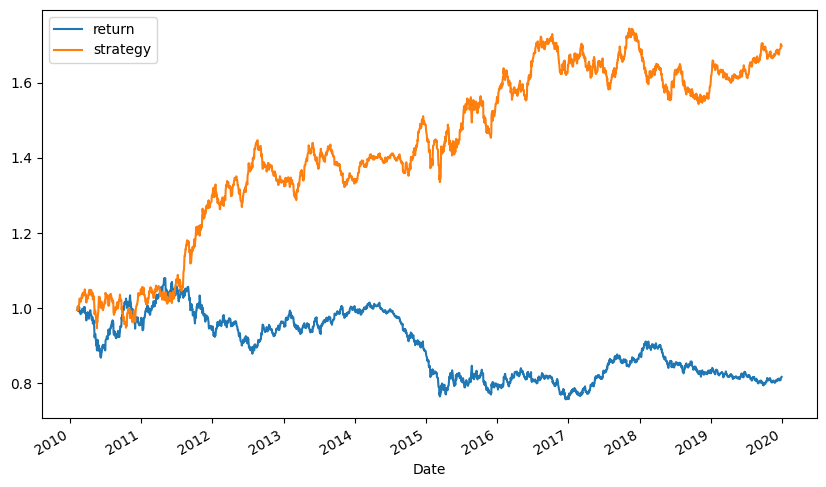

In [ ]:
# The prediction value is used to reflect the market positions(long/short) 

data['strategy'] = data['prediction'] * data['return'] 

data[['return', 'strategy']].sum().apply(np.exp)

data[['return', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize = (10,6))
plt.show()